In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

print data_train.sample(3)

     PassengerId  Survived  Pclass                               Name     Sex  \
568          569         0       3                Doharr, Mr. Tannous    male   
542          543         0       3  Andersson, Miss. Sigrid Elisabeth  female   
636          637         0       3         Leinonen, Mr. Antti Gustaf    male   

      Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
568   NaN      0      0               2686   7.2292   NaN        C  
542  11.0      4      2             347082  31.2750   NaN        S  
636  32.0      0      0  STON/O 2. 3101292   7.9250   NaN        S  


# Ejemplos en pandas

In [117]:
type(data_train["Survived"])

pandas.core.series.Series

In [118]:
# ¿Cuantas personas sobrevivieron y cuantas no (0: No sobrevivió, 1: Si sobrevivió)?
data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

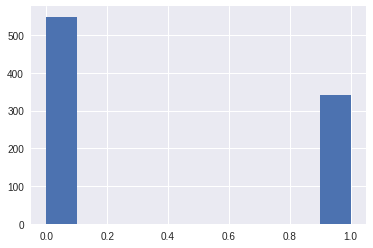

In [119]:
data_train["Survived"].hist()

In [120]:
# Mostrar las primeras 5 personas que tienen edad nula
data_train.loc[data_train["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [121]:
# Mostrar las 5 primeras personas que sean varones
data_train.loc[data_train["Sex"]=='male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [122]:
# ¿Cuántos varones sobrevivieron?
len(data_train.loc[(data_train["Sex"]=='male') & (data_train["Survived"]==1)])

109

# Assignment

### ● How many passengers from class 2 didn't survive?

In [123]:
# Se recomienda usar las funciones len y loc
len(data_train.loc[(data_train["Pclass"]==2) & (data_train["Survived"]==0)])

97

### ● In which properties have you found missing values?

In [124]:
# Se recomienda usar la funcion columns para conseguir la lista de columnas y la función isnull() para ver en cuantas filas
# cada columna es nula
for i in data_train.columns:
    if len(data_train.loc[data_train[i].isnull()]):
        print i

Age
Cabin
Embarked


### ● Please show us if at least there was one infant from Queenstown that managed to survive?, what about the others ports of embarkation?

In [125]:
# Se recomienda usar las funciones len y loc
# list(set(data_train["Embarked"])) nos muestra que las ciudades posibles son S,Q y C
print "Infants (at most age 15) embarked in Q:"
print len(data_train.loc[(data_train["Embarked"]=='Q') & (data_train["Survived"]==1) & (data_train["Age"]<=15)])
print "Infants (at most age 15) embarked in S:"
print len(data_train.loc[(data_train["Embarked"]=='S') & (data_train["Survived"]==1) & (data_train["Age"]<=15)])
print "Infants (at most age 15) embarked in C:"
print len(data_train.loc[(data_train["Embarked"]=='C') & (data_train["Survived"]==1) & (data_train["Age"]<=15)])

Infants (at most age 15) embarked in Q:
1
Infants (at most age 15) embarked in S:
34
Infants (at most age 15) embarked in C:
14


### Transforming Features

1. Aside from 'Sex', the 'Age' feature is second in importance. To avoid overfitting, I'm grouping people into logical human age groups.
2. Each Cabin starts with a letter. I bet this letter is much more important than the number that follows, let's slice it off.
3. Fare is another continuous value that should be simplified. I ran data_train.Fare.describe() to get the distribution of the feature, then placed them into quartile bins accordingly.
4. Extract information from the 'Name' feature. Rather than use the full name, I extracted the last name and name prefix (Mr. Mrs. Etc.), then appended them as their own features.
5. Lastly, drop useless features. (Ticket and Name)

In [126]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.
5,6,0,3,male,Unknown,0,0,2_quartile,N,"Moran,",Mr.
6,7,0,1,male,Adult,0,0,4_quartile,E,"McCarthy,",Mr.
7,8,0,3,male,Baby,3,1,3_quartile,N,"Palsson,",Master.
8,9,1,3,female,Young Adult,0,2,2_quartile,N,"Johnson,",Mrs.
9,10,1,2,female,Teenager,1,0,3_quartile,N,"Nasser,",Mrs.


In [127]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19
5,6,0,3,1,6,0,0,1,7,538,19
6,7,0,1,1,0,0,0,3,4,500,19
7,8,0,3,1,1,3,1,2,7,608,13
8,9,1,3,0,7,0,2,1,7,382,20
9,10,1,2,0,5,1,0,2,7,559,20


In [128]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,1,7,0,0,0,7,401,19
1,893,3,0,0,1,0,0,7,843,20
2,894,2,1,3,0,0,1,7,552,19
3,895,3,1,7,0,0,1,7,851,19
4,896,3,0,4,1,1,1,7,342,20


In [129]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

### ● Please implement your euclidean function

In [130]:
def dist_eucli(x_elem, y_elem):
    ##Asumimos que todos los campos de un pasajero importan para determinar su capacidad de sobrevivencia
    n=0
    suma=0
    for i in range(len(X_train.columns)-1):
        s = abs(x_elem[i] - y_elem[i])
        suma = suma + s
        n=n+1
    return ((suma)/n)

### ● Please implement your KNN function. This function has four parameters:
#### K - number of K neighbors
#### X_train - Training data set
#### y_train - class of elements (survive = 1, no survive = 0)
#### X_test - elements to classify

In [142]:
from random import randint
def my_KNN(K, X_train, y_train, X_test):
    ##Aprender de X_Train, aplicar a X_test
    ##Parametro fijo K
    ##Y_Train
    ##Para cada registro de X_test
    y_predict=[]
    for codigoAnalizado,rowI in X_test.iterrows():
        lista = []
        vecinos=[]
        clasesvecinos=[]
        nS=0
        nM=0
        ##Para cada registro de X_train
        for codigoJ,rowJ in X_train.iterrows():
            ##calcular distancia euclidiana
            d = dist_eucli(rowI,rowJ)
            ##Agregar a la lista de distancias con respecto de i, ordenada por distancias
            lista.append((d,codigoJ,rowJ))
            lista.sort(key=lambda u: u[0])
        ##Despues de tener toda la lista de distancias, tomar las 3 menores distancias
        
        ##Estos son los K vecinos de I en X_Test
        vecinos=lista[0:(K+1)]
        for w in vecinos:
            ##Extraer el codigo de cada vecino
            codigoW = w[1]
            ##Extraer la clase de cada vecino
            claseW = y_train[codigoW]
            ##Si el vecino W esta muerto, subir nM. Sino, subir nS
            if claseW==1:
                nS=nS+1
            if claseW==0:
                nM=nM+1
        ##Si hay mas vecinos vivos que muertos, asignar clase = 1
        if nS > nM:
            y_predict.append(1)
        if nS < nM:
            y_predict.append(0)
        ##Si hay un numero igual de vecinos, asignar al azar
        if nS == nM:
            y_predict.append((randint(0,1)))
            
    return(y_predict)    

In [ ]:
y_prediction= my_KNN(3,X_train,y_train,X_test)
print y_prediction

In [141]:
print(accuracy_score(y_test,y_prediction)*100)

ValueError: Can't handle mix of binary and multiclass-multioutput

In [140]:
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [137]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

NameError: name 'accuracy_score' is not defined